In [1215]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import seaborn as sns

In [1216]:
states = pd.read_excel("2007-2016-PIT-Counts-by-State.xlsx")

In [1217]:
states.head()

,state,"Change in Total Homelessness, 2015-2016","Change in Total Homelessness, 2014-2016","Change in Total Homelessness, 2013-2016","Change in Total Homelessness, 2012-2016","Change in Total Homelessness, 2011-2016","Change in Total Homelessness, 2010-2016","Change in Total Homelessness, 2009-2016","Change in Total Homelessness, 2008-2016","Change in Total Homelessness, 2007-2016"
0,AK,-0.008180,0.087444,-0.003083,0.014114,-0.088346,0.041331,-0.026104,0.178615,0.181486
1,AL,0.035516,-0.098663,-0.123267,-0.210789,-0.260345,-0.320046,-0.323849,-0.236867,-0.245965
2,AR,-0.037891,-0.161104,-0.353882,-0.415520,-0.280666,-0.108255,-0.136396,-0.243318,-0.357925
3,AZ,-0.019099,-0.075083,-0.080951,-0.141125,-0.075876,-0.292028,-0.340602,-0.222694,-0.337225
4,CA,0.020771,0.036770,-0.003458,-0.016287,-0.055831,-0.043230,-0.044761,-0.134687,-0.149972


In [1218]:
details_16 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx")

In [1219]:
details_16.head()

,CoC Number,CoC Name,"Total Homeless, 2016","Sheltered Homeless, 2016","Unsheltered Homeless, 2016","Homeless Individuals, 2016","Sheltered Homeless Individuals, 2016","Unsheltered Homeless Individuals, 2016","Homeless People in Families, 2016","Sheltered Homeless People in Families, 2016",...,"Unsheltered Parenting Youth (Under 25), 2016","Parenting Youth Under 18, 2016","Sheltered Parenting Youth Under 18, 2016","Unsheltered Parenting Youth Under 18, 2016","Parenting Youth Age 18-24, 2016","Sheltered Parenting Youth Age 18-24, 2016","Unsheltered Parenting Youth Age 18-24, 2016","Children of Parenting Youth, 2016","Sheltered Children of Parenting Youth, 2016","Unsheltered Children of Parenting Youth, 2016"
0,AK-500,Anchorage CoC,1105.0,865.0,240.0,905.0,665.0,240.0,200.0,200.0,...,0.0,0.0,0.0,0.0,6.0,6.0,0.0,6.0,6.0,0.0
1,AK-501,Alaska Balance of State CoC,835.0,633.0,202.0,622.0,424.0,198.0,213.0,209.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,4.0,0.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1228.0,1032.0,196.0,927.0,743.0,184.0,301.0,289.0,...,0.0,5.0,5.0,0.0,7.0,7.0,0.0,19.0,19.0,0.0
3,AL-501,Mobile City & County/Baldwin County CoC,623.0,387.0,236.0,477.0,253.0,224.0,146.0,134.0,...,1.0,0.0,0.0,0.0,7.0,6.0,1.0,9.0,8.0,1.0
4,AL-502,Florence/Northwest Alabama CoC,337.0,286.0,51.0,194.0,155.0,39.0,143.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1220]:
details = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx")

In [1317]:
details.head()

,CoC Number,CoC Name,"Total Homeless, 2016","Sheltered Homeless, 2016","Unsheltered Homeless, 2016","Homeless Individuals, 2016","Sheltered Homeless Individuals, 2016","Unsheltered Homeless Individuals, 2016","Homeless People in Families, 2016","Sheltered Homeless People in Families, 2016",...,"Unsheltered Parenting Youth (Under 25), 2016","Parenting Youth Under 18, 2016","Sheltered Parenting Youth Under 18, 2016","Unsheltered Parenting Youth Under 18, 2016","Parenting Youth Age 18-24, 2016","Sheltered Parenting Youth Age 18-24, 2016","Unsheltered Parenting Youth Age 18-24, 2016","Children of Parenting Youth, 2016","Sheltered Children of Parenting Youth, 2016","Unsheltered Children of Parenting Youth, 2016"
0,AK-500,Anchorage CoC,1105.0,865.0,240.0,905.0,665.0,240.0,200.0,200.0,...,0.0,0.0,0.0,0.0,6.0,6.0,0.0,6.0,6.0,0.0
1,AK-501,Alaska Balance of State CoC,835.0,633.0,202.0,622.0,424.0,198.0,213.0,209.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,4.0,0.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1228.0,1032.0,196.0,927.0,743.0,184.0,301.0,289.0,...,0.0,5.0,5.0,0.0,7.0,7.0,0.0,19.0,19.0,0.0
3,AL-501,Mobile City & County/Baldwin County CoC,623.0,387.0,236.0,477.0,253.0,224.0,146.0,134.0,...,1.0,0.0,0.0,0.0,7.0,6.0,1.0,9.0,8.0,1.0
4,AL-502,Florence/Northwest Alabama CoC,337.0,286.0,51.0,194.0,155.0,39.0,143.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1222]:
df = pd.read_csv("2007-2016-HIC-Counts-by-CoC.csv")

In [1223]:
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [1224]:
df.Measures.unique()

array(['Chronically Homeless Individuals', 'Homeless Individuals',
       'Homeless People in Families',
       'Sheltered Chronically Homeless Individuals', 'Sheltered Homeless',
       'Sheltered Homeless Individuals',
       'Sheltered Homeless People in Families', 'Total Homeless',
       'Unsheltered Chronically Homeless Individuals',
       'Unsheltered Homeless', 'Unsheltered Homeless Individuals',
       'Unsheltered Homeless People in Families', 'Chronically Homeless',
       'Chronically Homeless People in Families', 'Homeless Veterans',
       'Sheltered Chronically Homeless',
       'Sheltered Chronically Homeless People in Families',
       'Sheltered Homeless Veterans', 'Unsheltered Chronically Homeless',
       'Unsheltered Chronically Homeless People in Families',
       'Unsheltered Homeless Veterans', 'Children of Parenting Youth',
       'Homeless Unaccompanied Children (Under 18)',
       'Homeless Unaccompanied Young Adults (Age 18-24)',
       'Homeless Unaccompan

In [1225]:
df.shape

(86529, 6)

In [1226]:
df.dtypes

Year          object
State         object
CoC Number    object
CoC Name      object
Measures      object
Count         object
dtype: object

In [1227]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year              
AK    1/1/2007    974668
      1/1/2008  1,023623
      1/1/2009  1,267725
      1/1/2010  1,231632
      1/1/2011  1,223905

In [1228]:
df['Count'] = df['Count'].str.replace(',', '').astype(int)

In [1229]:
df.dtypes

Year          object
State         object
CoC Number    object
CoC Name      object
Measures      object
Count          int64
dtype: object

In [1230]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year           
AK    1/1/2007   1642
      1/1/2008   1646
      1/1/2009   1992
      1/1/2010   1863
      1/1/2011   2128

In [1231]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year           
AK    1/1/2007   1642
      1/1/2008   1646
      1/1/2009   1992
      1/1/2010   1863
      1/1/2011   2128

In [1232]:
import re

In [1233]:
df['Year'] = df['Year'].str.extract('\d{1,2}/\d{1,2}/(\d{2,4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [1234]:
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [1235]:
df.drop(['CoC Number','CoC Name'], axis=1, inplace=True)

In [1236]:
df.head()

,Year,State,Measures,Count
0,2007,AK,Chronically Homeless Individuals,224
1,2007,AK,Homeless Individuals,696
2,2007,AK,Homeless People in Families,278
3,2007,AK,Sheltered Chronically Homeless Individuals,187
4,2007,AK,Sheltered Homeless,842


In [1237]:
df.groupby('Measures')['Count'].sum().sort_values(ascending=False).head()

Measures
Total Homeless                 6081137
Sheltered Homeless             3927844
Homeless Individuals           3816262
Homeless People in Families    2264875
Unsheltered Homeless           2153293
Name: Count, dtype: int64

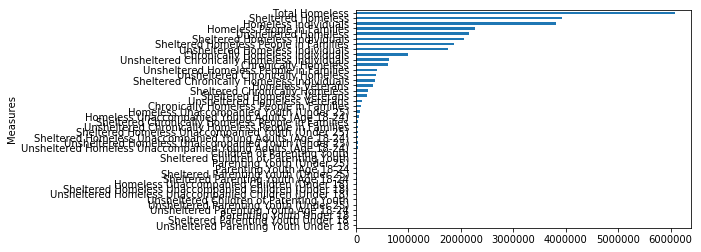

In [1238]:
df.groupby('Measures')['Count'].sum().sort_values(ascending=True).plot(kind='barh', )

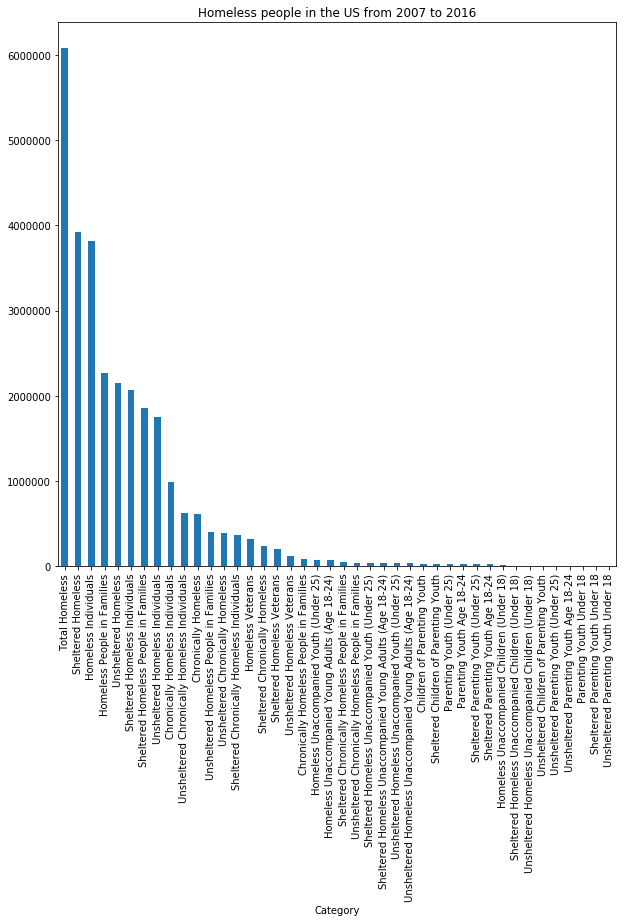

In [1239]:
ax = df.groupby('Measures')['Count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
ax.set_title("Homeless people in the US from 2007 to 2016")
ax.set_xlabel("Category")

plt.savefig("homeless_category.pdf")

In [1240]:
shel = df[df['Measures'] == 'Sheltered Homeless'] 
shel.head()

,Year,State,Measures,Count
4,2007,AK,Sheltered Homeless,842
16,2007,AK,Sheltered Homeless,545
28,2007,AL,Sheltered Homeless,1240
40,2007,AL,Sheltered Homeless,410
52,2007,AL,Sheltered Homeless,131


In [1241]:
unshel = df[df['Measures'] == 'Unsheltered Homeless']
unshel.head()

,Year,State,Measures,Count
9,2007,AK,Unsheltered Homeless,132
21,2007,AK,Unsheltered Homeless,123
33,2007,AL,Unsheltered Homeless,864
45,2007,AL,Unsheltered Homeless,239
57,2007,AL,Unsheltered Homeless,134


In [1242]:
shel.Count.sum()

3927844

In [1243]:
unshel.Count.sum()

2153293

In [1244]:
#just checking that the number is correct with the result 
3927844 + 2153293

6081137

In [1245]:
unshel_kids = df[df['Measures'] == 'Unsheltered Homeless Unaccompanied Children (Under 18)']
unshel_kids.head()

,Year,State,Measures,Count
52754,2015,AK,Unsheltered Homeless Unaccompanied Children (U...,3
52796,2015,AK,Unsheltered Homeless Unaccompanied Children (U...,3
52838,2015,AL,Unsheltered Homeless Unaccompanied Children (U...,0
52880,2015,AL,Unsheltered Homeless Unaccompanied Children (U...,0
52922,2015,AL,Unsheltered Homeless Unaccompanied Children (U...,0


In [1246]:
shel_kids = df[df['Measures'] == 'Sheltered Homeless Unaccompanied Children (Under 18)']
shel_kids.head()

,Year,State,Measures,Count
52739,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
52781,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
52823,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,9
52865,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,1
52907,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,0


In [1247]:
df_kids = pd.concat([shel_kids, unshel_kids], ignore_index=True)
df_kids.head()

,Year,State,Measures,Count
0,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
1,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
2,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,9
3,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,1
4,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,0


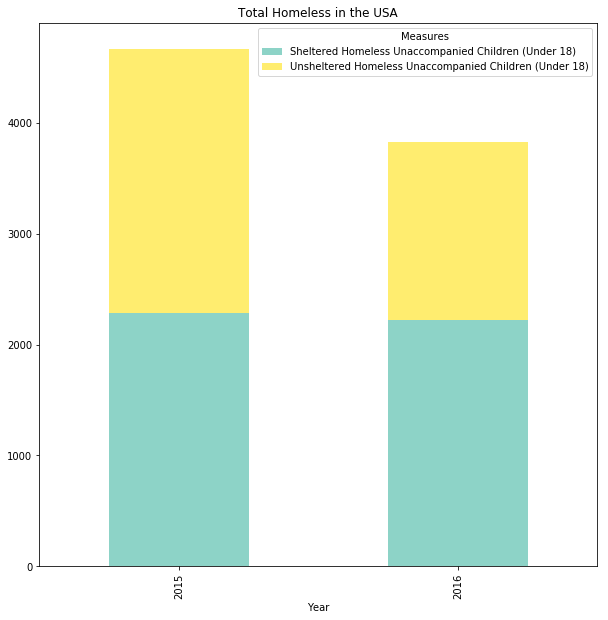

In [1248]:
#Sheltered VS Unsheltered kids
df_kids.groupby(['Year', 'Measures'])['Count'].sum().unstack().plot.bar(stacked=True, title='Total Homeless in the USA', legend= True, colormap='Set3', figsize=(10,10))

In [1249]:
df_new = pd.concat([shel, unshel], ignore_index=True)
df_new.head()

,Year,State,Measures,Count
0,2007,AK,Sheltered Homeless,842
1,2007,AK,Sheltered Homeless,545
2,2007,AL,Sheltered Homeless,1240
3,2007,AL,Sheltered Homeless,410
4,2007,AL,Sheltered Homeless,131


In [1250]:
#sns.barplot(x="Measures", y="Count", data=df)

In [1251]:
#plt.rcParams['figure.figsize']=(10,10)
#sns.barplot(x="Count", y="Measures", data=df)

In [1252]:
df_new.groupby('Year')['Count'].sum()

Year
2007    647258
2008    639784
2009    630227
2010    637077
2011    623788
2012    621553
2013    590364
2014    576450
2015    564708
2016    549928
Name: Count, dtype: int64

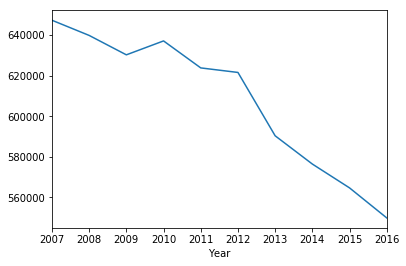

In [1253]:
df_new.groupby('Year')['Count'].sum().plot()

plt.savefig("homeless_diff.pdf")

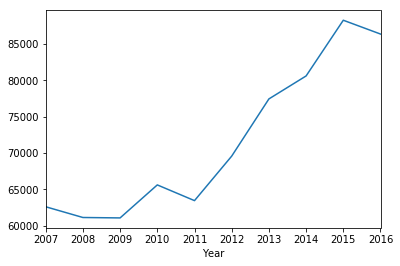

In [1313]:
df_new[df_new['State'] == 'NY'].groupby('Year')['Count'].sum().plot()

plt.savefig("ny_diff.pdf")

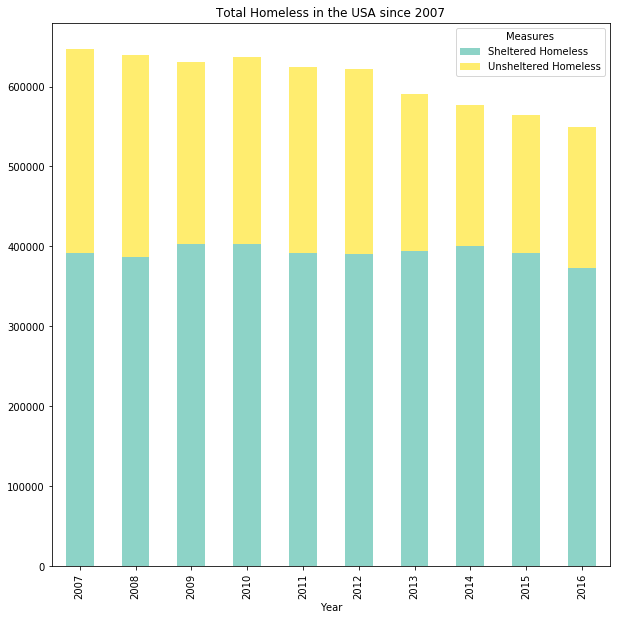

In [1305]:
#Sheltered VS Unsheltered 
df_new.groupby(['Year', 'Measures'])['Count'].sum().unstack().plot.bar(stacked=True, 
    title='Total Homeless in the USA since 2007', legend= True, colormap='Set3', figsize=(10,10))

plt.savefig("total.pdf")

In [1256]:
#population

df_pop = pd.read_csv("population.csv")
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,Alabama,"4,785,492","4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,Alaska,"714,031","722,713","731,089","736,879","736,705","737,709","741,894"
2,Arizona,"6,408,312","6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,Arkansas,"2,921,995","2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,California,"37,332,685","37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [1257]:
df_pop['State'] = df_pop['State'].replace({'Alaska':'AK', 'Alabama':'AL', 'Arkansas':'AR', 'Arizona':'AZ', 
                      'California':'CA', 'Colorado':'CO', 'Connecticut':'CT', 
                      'District of Columbia':'DC', 'Delaware':'DE', 'Florida':'FL', 
                      'Georgia':'GA', 'Hawaii':'HI', 'Iowa':'IA', 
                      'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Kansas':'KS', 
                      'Kentucky':'KY', 'Louisiana':'LA', 'Massachusetts':'MA', 'Maryland':'MD', 
                      'Maine':'ME', 'Michigan':'MI', 'Minnesota':'MN', 'Missouri':'MO', 
                      'Mississippi':'MS', 'Montana':'MT', 'North Carolina':'NC', 
                      'North Dakota':'ND', 'Nebraska':'NE', 'New Hampshire':'NH', 
                      'New Jersey':'NJ', 'New Mexico':'NM', 'Nevada':'NV', 'New York':'NY', 
                      'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 
                      'Puerto Rico':'PR', 'Rhode Island':'RI', 'South Carolina':'SC', 
                      'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 
                      'Virginia':'VA', 'Vermont':'VT', 'Washington':'WA', 
                      'Wisconsin':'WI', 'West Virginia':'WV', 'Wyoming':'WY'})

In [1258]:
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,AL,"4,785,492","4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,AK,"714,031","722,713","731,089","736,879","736,705","737,709","741,894"
2,AZ,"6,408,312","6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,AR,"2,921,995","2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,CA,"37,332,685","37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [1259]:
df_pop.dtypes

State    object
2010     object
2011     object
2012     object
2013     object
2014     object
2015     object
2016     object
dtype: object

In [1260]:
df_pop['2010'] = df_pop['2010'].str.replace(',', '').astype(int)

In [1261]:
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,AL,4785492,"4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,AK,714031,"722,713","731,089","736,879","736,705","737,709","741,894"
2,AZ,6408312,"6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,AR,2921995,"2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,CA,37332685,"37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [1262]:
df_pop['2011'] = df_pop['2011'].str.replace(',', '').astype(int)

In [1263]:
df_pop['2012'] = df_pop['2012'].str.replace(',', '').astype(int)

In [1264]:
df_pop['2013'] = df_pop['2013'].str.replace(',', '').astype(int)

In [1265]:
df_pop['2014'] = df_pop['2014'].str.replace(',', '').astype(int)

In [1266]:
df_pop['2015'] = df_pop['2015'].str.replace(',', '').astype(int)

In [1267]:
df_pop['2016'] = df_pop['2016'].str.replace(',', '').astype(int)

In [1268]:
df_merged = df.merge(df_pop, on='State')
df_merged.head()

,Year,State,Measures,Count,2010,2011,2012,2013,2014,2015,2016
0,2007,AK,Chronically Homeless Individuals,224,714031,722713,731089,736879,736705,737709,741894
1,2007,AK,Homeless Individuals,696,714031,722713,731089,736879,736705,737709,741894
2,2007,AK,Homeless People in Families,278,714031,722713,731089,736879,736705,737709,741894
3,2007,AK,Sheltered Chronically Homeless Individuals,187,714031,722713,731089,736879,736705,737709,741894
4,2007,AK,Sheltered Homeless,842,714031,722713,731089,736879,736705,737709,741894


In [1269]:
df_merged.tail()

,Year,State,Measures,Count,2010,2011,2012,2013,2014,2015,2016
86092,2016,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7,564513,567725,576765,582684,583642,586555,585501
86093,2016,WY,Unsheltered Homeless Veterans,31,564513,567725,576765,582684,583642,586555,585501
86094,2016,WY,Unsheltered Parenting Youth (Under 25),3,564513,567725,576765,582684,583642,586555,585501
86095,2016,WY,Unsheltered Parenting Youth Age 18-24,3,564513,567725,576765,582684,583642,586555,585501
86096,2016,WY,Unsheltered Parenting Youth Under 18,0,564513,567725,576765,582684,583642,586555,585501


In [1270]:
df_2016 = df_merged[df_merged['Year']=='2016']

In [1271]:
df_2016.head()

,Year,State,Measures,Count,2010,2011,2012,2013,2014,2015,2016
348,2016,AK,Children of Parenting Youth,6,714031,722713,731089,736879,736705,737709,741894
349,2016,AK,Chronically Homeless,50,714031,722713,731089,736879,736705,737709,741894
350,2016,AK,Chronically Homeless Individuals,48,714031,722713,731089,736879,736705,737709,741894
351,2016,AK,Chronically Homeless People in Families,2,714031,722713,731089,736879,736705,737709,741894
352,2016,AK,Homeless Individuals,905,714031,722713,731089,736879,736705,737709,741894


In [1272]:
#Sheltered VS Unsheltered 
#df_2016.groupby(['State', 'Measures'])['Count'].sum().unstack().plot.bar(stacked=True, title='Total Homeless in the USA', legend= True, colormap='Set3', figsize=(10,20))

In [1273]:
#California has the most
cal = df_2016[df_2016['State']=='CA']

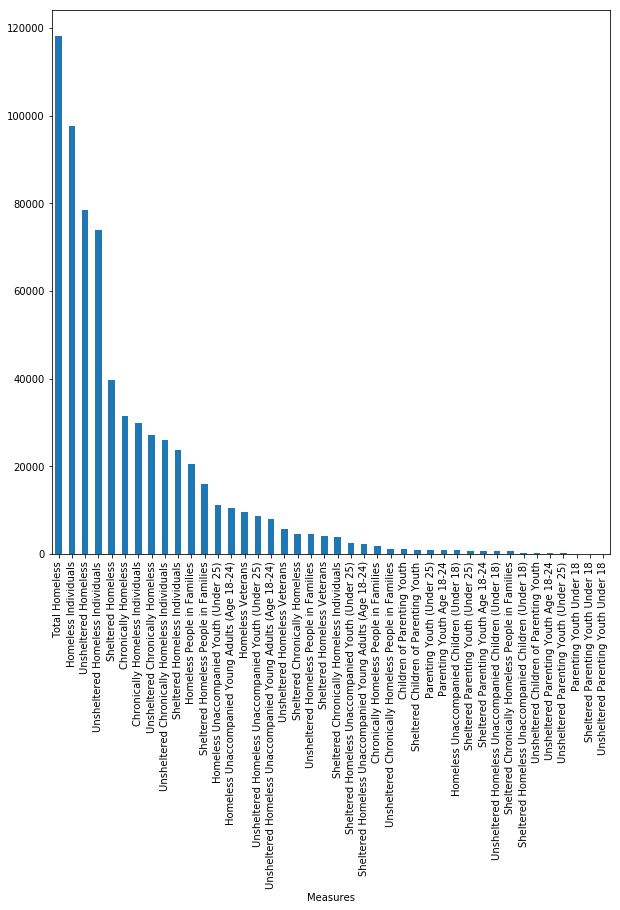

In [1274]:
#what categories ?
cal.groupby('Measures')['Count'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

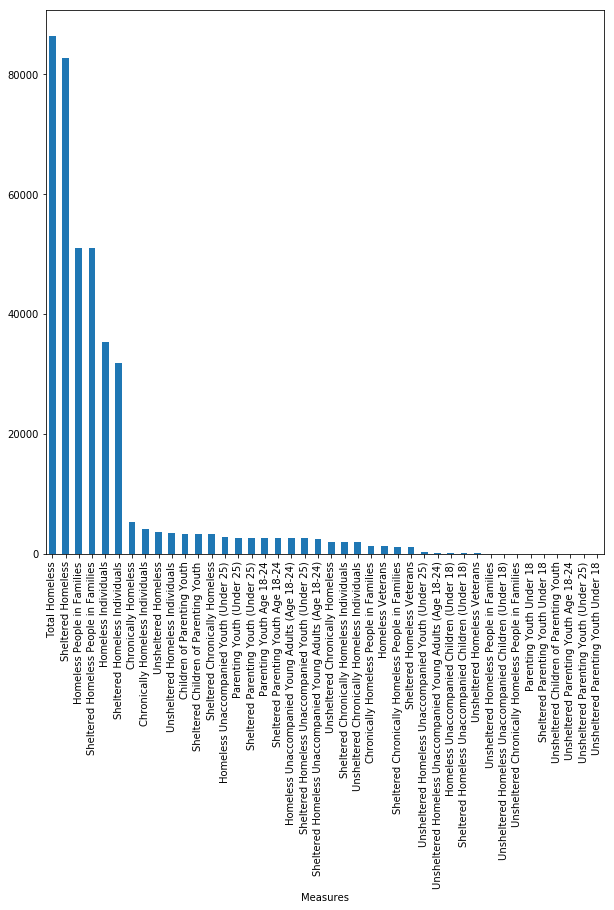

In [1275]:
#New York has the most
ny = df_2016[df_2016['State']=='NY']
ny.groupby('Measures')['Count'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

In [1276]:
ny.groupby('Measures')['Count'].sum().sort_values(ascending=False)

Measures
Total Homeless                                                 86352
Sheltered Homeless                                             82761
Homeless People in Families                                    51037
Sheltered Homeless People in Families                          50968
Homeless Individuals                                           35315
Sheltered Homeless Individuals                                 31793
Chronically Homeless                                            5368
Chronically Homeless Individuals                                4112
Unsheltered Homeless                                            3591
Unsheltered Homeless Individuals                                3522
Children of Parenting Youth                                     3311
Sheltered Children of Parenting Youth                           3304
Sheltered Chronically Homeless                                  3299
Homeless Unaccompanied Youth (Under 25)                         2889
Parenting Youth (Under 25

In [1277]:
cal.groupby('Measures')['Count'].sum().sort_values(ascending=False)

Measures
Total Homeless                                                 118142
Homeless Individuals                                            97660
Unsheltered Homeless                                            78390
Unsheltered Homeless Individuals                                73940
Sheltered Homeless                                              39752
Chronically Homeless                                            31548
Chronically Homeless Individuals                                29802
Unsheltered Chronically Homeless                                27070
Unsheltered Chronically Homeless Individuals                    25892
Sheltered Homeless Individuals                                  23720
Homeless People in Families                                     20482
Sheltered Homeless People in Families                           16032
Homeless Unaccompanied Youth (Under 25)                         11222
Homeless Unaccompanied Young Adults (Age 18-24)                 10375
Homeless Ve

In [1278]:
#Let's standarize with the population
df_2016 = df_2016[df_2016['Measures']=='Total Homeless']
df_2016 = df_2016.groupby(['State','Year',])[['Count']].sum()
df_2016.head()

,,Count
State,Year,
AK,2016,1940
AL,2016,4111
AR,2016,2463
AZ,2016,9707
CA,2016,118142


In [1279]:
df_2016.reset_index(inplace=True)

In [1280]:
df_2016 = df_2016.merge(df_pop, on='State')
df_2016.head()

,State,Year,Count,2010,2011,2012,2013,2014,2015,2016
0,AK,2016,1940,714031,722713,731089,736879,736705,737709,741894
1,AL,2016,4111,4785492,4799918,4815960,4829479,4843214,4853875,4863300
2,AR,2016,2463,2921995,2939493,2950685,2958663,2966912,2977853,2988248
3,AZ,2016,9707,6408312,6467163,6549634,6624617,6719993,6817565,6931071
4,CA,2016,118142,37332685,37676861,38011074,38335203,38680810,38993940,39250017


In [1281]:
#what percent of the population are homeless?
df_2016['per'] = df_2016['Count']/df_2016['2016']

In [1282]:
df_2016['total_hom']= df_2016['Count']/df_2016['Count'].sum()

In [1283]:
df_2016.head()

,State,Year,Count,2010,2011,2012,2013,2014,2015,2016,per,total_hom
0,AK,2016,1940,714031,722713,731089,736879,736705,737709,741894,0.002615,0.003537
1,AL,2016,4111,4785492,4799918,4815960,4829479,4843214,4853875,4863300,0.000845,0.007495
2,AR,2016,2463,2921995,2939493,2950685,2958663,2966912,2977853,2988248,0.000824,0.004490
3,AZ,2016,9707,6408312,6467163,6549634,6624617,6719993,6817565,6931071,0.001401,0.017697
4,CA,2016,118142,37332685,37676861,38011074,38335203,38680810,38993940,39250017,0.003010,0.215390


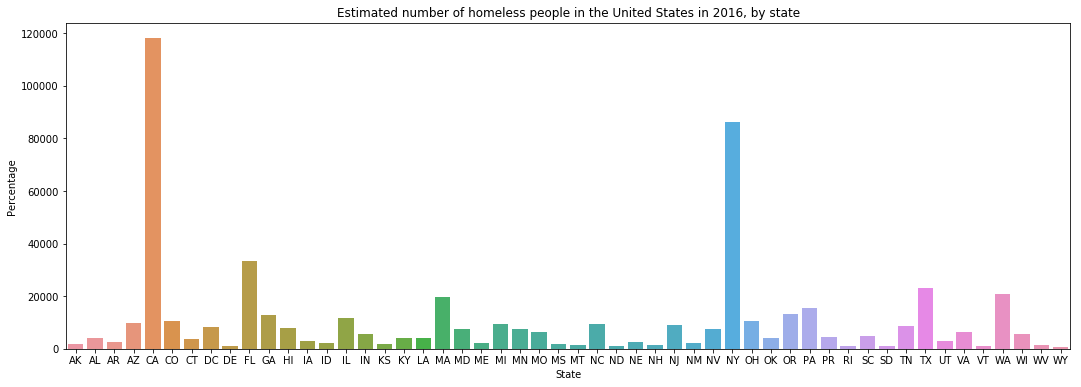

In [1308]:
plt.figure(figsize=(18,6))
sns.barplot(y='Count', x='State', data=df_2016)
plt.ylabel('Percentage')
plt.title('Estimated number of homeless people in the United States in 2016, by state')

plt.savefig("no_pop.pdf")

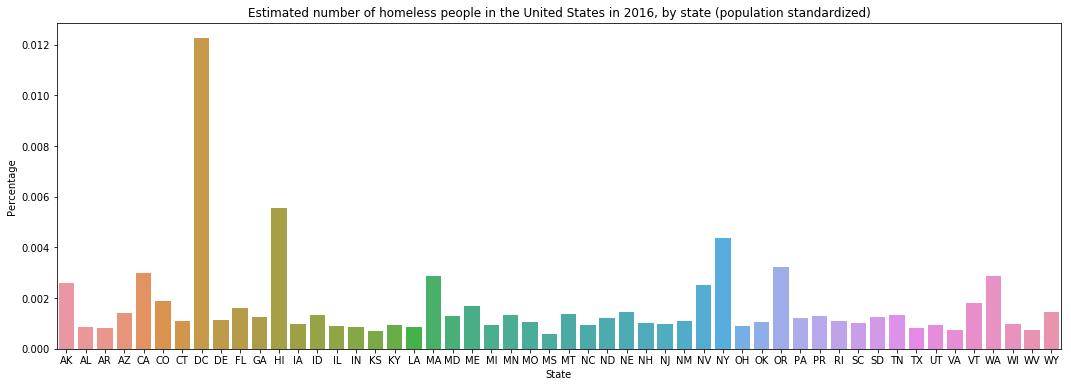

In [1311]:
#population standardized
plt.figure(figsize=(18,6))
sns.barplot(y='per', x='State', data=df_2016)
plt.ylabel('Percentage')
plt.title('Estimated number of homeless people in the United States in 2016, by state (population standardized)')

plt.savefig("pop_stand.pdf")

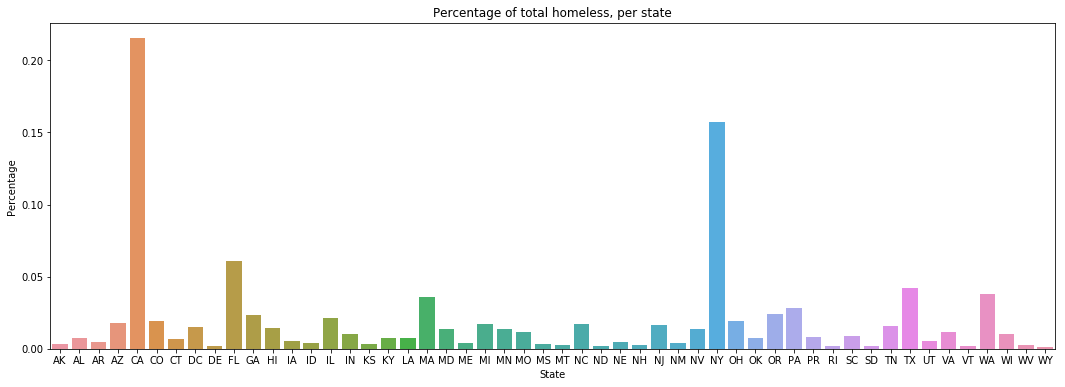

In [1306]:
#population standardized
plt.figure(figsize=(18,6))
sns.barplot(y='total_hom', x='State', data=df_2016)
plt.ylabel('Percentage')
plt.title('Percentage of total homeless, per state')

plt.savefig("per_hom.pdf")

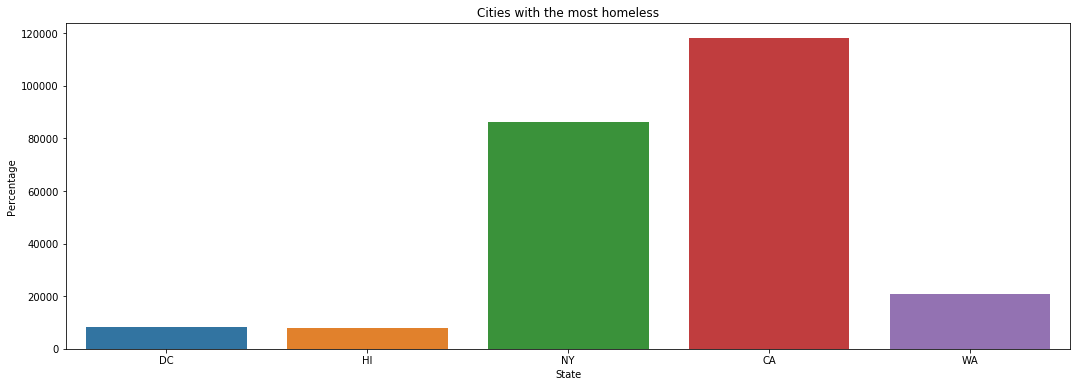

In [1287]:
#stand
plt.figure(figsize=(18,6))
sns.barplot(y='Count', x='State', data=df_2016, order=["DC", "HI", "NY", "CA", "WA"])
plt.ylabel('Percentage')
plt.title('Cities with the most homeless')

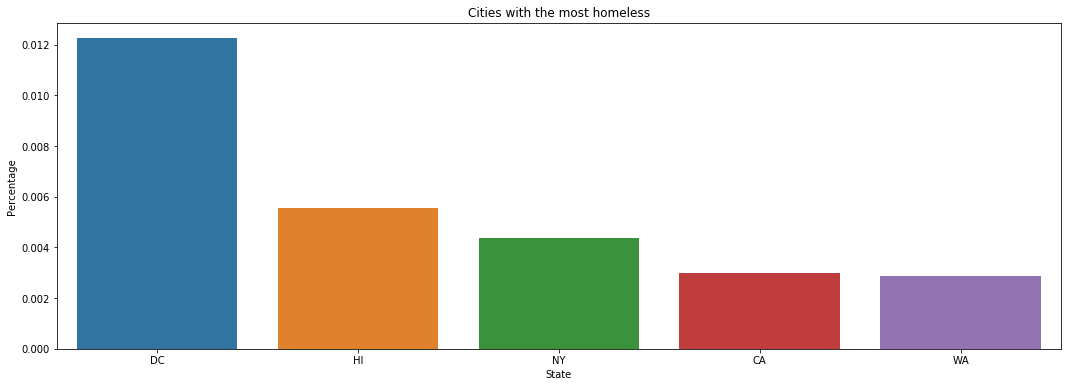

In [1288]:
#stand
plt.figure(figsize=(18,6))
sns.barplot(y='per', x='State', data=df_2016, order=["DC", "HI", "NY", "CA", "WA"])
plt.ylabel('Percentage')
plt.title('Cities with the most homeless')

In [1289]:
df2 = df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum()
df3 = df2.reset_index()

In [1290]:
df3.head()

,State,Year,Count
0,AK,2007,1642
1,AK,2008,1646
2,AK,2009,1992
3,AK,2010,1863
4,AK,2011,2128


In [1291]:
df4 = df3[(df3['Year']=='2016') | (df3['Year']=='2010')]
df4.head()

,State,Year,Count
3,AK,2010,1863
9,AK,2016,1940
13,AL,2010,6046
19,AL,2016,4111
23,AR,2010,2762


In [1292]:
diff = df4.groupby('State')[['Count']].diff().fillna(0)
diff.head(1)

,Count
3,0.0


In [1293]:
diff.columns=['Diff']
diff.head(1)

,Diff
3,0.0


In [1294]:
df_join = diff.join(df4)
df_join.head(2)

,Diff,State,Year,Count
3,0.0,AK,2010,1863
9,77.0,AK,2016,1940


In [1295]:
diff1 = df_join.groupby('State')['Diff'].sum()
diff1

State
AK       77.0
AL    -1935.0
AR     -299.0
AZ    -4004.0
CA    -5338.0
CO    -4932.0
CT     -414.0
DC     1811.0
DE       88.0
FL   -23992.0
GA    -6927.0
GU     -550.0
HI     2087.0
IA       50.0
ID      -99.0
IL    -2805.0
IN     -654.0
KS      199.0
KY    -2386.0
LA    -8488.0
MA     2962.0
MD    -3156.0
ME     -138.0
MI    -3742.0
MN     -528.0
MO    -1896.0
MS    -1005.0
MT     -197.0
NC    -2632.0
ND      124.0
NE    -1123.0
NH     -208.0
NJ    -4842.0
NM    -1212.0
NV    -3807.0
NY    20746.0
OH    -2165.0
OK    -1122.0
OR    -6254.0
PA      823.0
PR      269.0
RI     -122.0
SC      578.0
SD      341.0
TN    -1497.0
TX   -11999.0
UT     -477.0
VA    -2812.0
VI     -146.0
VT     -103.0
WA    -2051.0
WI     -648.0
WV     -877.0
WY      278.0
Name: Diff, dtype: float64

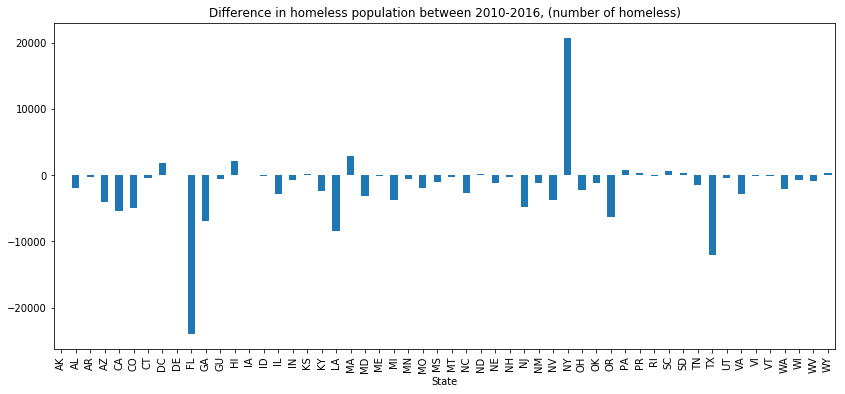

In [1296]:
diff1.plot.bar(figsize=(14,6))
plt.title('Difference in homeless population between 2010-2016, (number of homeless)')
plt.show()

plt.savefig("nyhomeless_diff.pdf")

In [1297]:
states.head()

,state,"Change in Total Homelessness, 2015-2016","Change in Total Homelessness, 2014-2016","Change in Total Homelessness, 2013-2016","Change in Total Homelessness, 2012-2016","Change in Total Homelessness, 2011-2016","Change in Total Homelessness, 2010-2016","Change in Total Homelessness, 2009-2016","Change in Total Homelessness, 2008-2016","Change in Total Homelessness, 2007-2016"
0,AK,-0.008180,0.087444,-0.003083,0.014114,-0.088346,0.041331,-0.026104,0.178615,0.181486
1,AL,0.035516,-0.098663,-0.123267,-0.210789,-0.260345,-0.320046,-0.323849,-0.236867,-0.245965
2,AR,-0.037891,-0.161104,-0.353882,-0.415520,-0.280666,-0.108255,-0.136396,-0.243318,-0.357925
3,AZ,-0.019099,-0.075083,-0.080951,-0.141125,-0.075876,-0.292028,-0.340602,-0.222694,-0.337225
4,CA,0.020771,0.036770,-0.003458,-0.016287,-0.055831,-0.043230,-0.044761,-0.134687,-0.149972


In [1298]:
states.drop(['Change in Total Homelessness, 2015-2016', 'Change in Total Homelessness, 2014-2016','Change in Total Homelessness, 2013-2016', 'Change in Total Homelessness, 2012-2016', 'Change in Total Homelessness, 2011-2016', 'Change in Total Homelessness, 2009-2016', 'Change in Total Homelessness, 2008-2016', 'Change in Total Homelessness, 2007-2016'], axis=1, inplace=True)

In [1299]:
states.head()

,state,"Change in Total Homelessness, 2010-2016"
0,AK,0.041331
1,AL,-0.320046
2,AR,-0.108255
3,AZ,-0.292028
4,CA,-0.043230


In [1300]:
combined_df = df_join.merge(states, left_on="State", right_on="state")
combined_df.head()

,Diff,State,Year,Count,state,"Change in Total Homelessness, 2010-2016"
0,0.0,AK,2010,1863,AK,0.041331
1,77.0,AK,2016,1940,AK,0.041331
2,0.0,AL,2010,6046,AL,-0.320046
3,-1935.0,AL,2016,4111,AL,-0.320046
4,0.0,AR,2010,2762,AR,-0.108255


In [1316]:
diff2 = combined_df.groupby('State')['Change in Total Homelessness, 2010-2016'].sum()
diff2

State
AK    0.082662
AL   -0.640092
AR   -0.216510
AZ   -0.584056
CA   -0.086460
CO   -0.637126
CT   -0.191844
DC    0.553907
DE    0.179226
FL   -0.833764
GA   -0.698428
GU   -0.672782
HI    0.715461
IA    0.033179
ID   -0.084398
IL   -0.389718
IN   -0.202728
KS    0.228261
KY   -0.720520
LA   -1.360038
MA    0.355881
MD   -0.582020
ME   -0.116016
MI   -0.573136
MN   -0.134198
MO   -0.474760
MS   -0.732774
MT   -0.243962
NC   -0.431794
ND    0.310388
NE   -0.579314
NH   -0.264294
NJ   -0.704958
NM   -0.697554
NV   -0.679518
NY    0.632442
OH   -0.344498
OK   -0.429146
OR   -0.641700
PA    0.113392
PR    0.129670
RI   -0.190328
SC    0.258440
SD    0.932969
TN   -0.291358
TX   -0.683294
UT   -0.290500
VA   -0.619384
VI   -0.599590
VT   -0.168852
WA   -0.179298
WI   -0.204642
WV   -0.774734
WY    0.960276
Name: Change in Total Homelessness, 2010-2016, dtype: float64

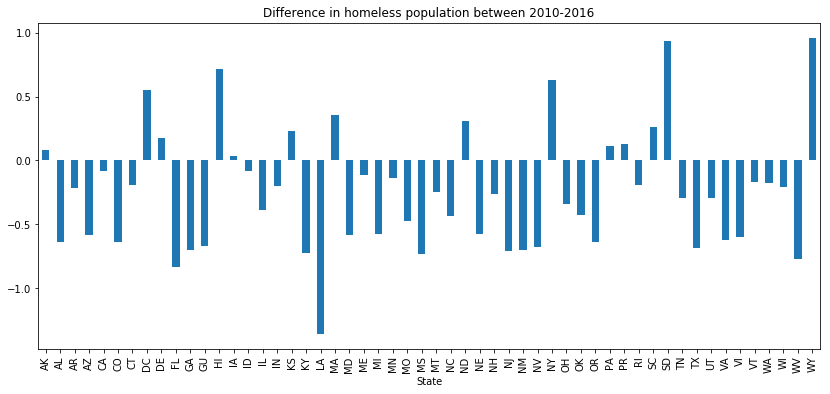

In [1302]:
diff2.plot.bar(figsize=(14,6))
plt.title('Difference in homeless population between 2010-2016')
plt.show()

plt.savefig("nyhomeless_diff2.pdf")

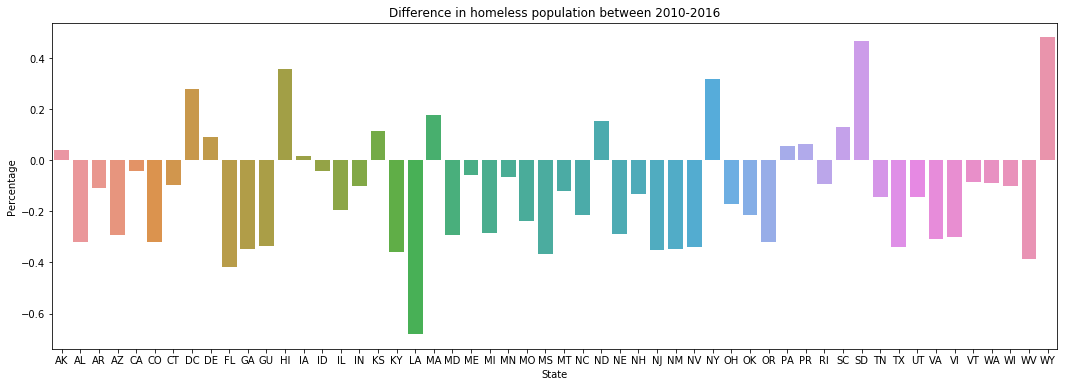

In [1312]:

plt.figure(figsize=(18,6))
sns.barplot(y='Change in Total Homelessness, 2010-2016', x='State', data=combined_df)
plt.ylabel('Percentage')
plt.title('Difference in homeless population between 2010-2016')

plt.savefig("pop_stand2.pdf")